# 9 逻辑回归

$y=1/x$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.linspace(-50, 50, 1000)
y = 1 / (1 + np.exp(-x))

[-51, 51, 0, 1]

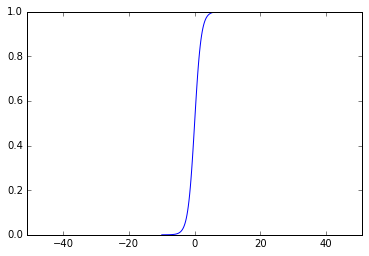

In [6]:
plt.plot(x,y)
plt.axis([-51, 51, 0, 1])

## 实现逻辑回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
X = iris.data
y = iris.target

In [3]:
X.shape, y.shape

((150, 4), (150,))

In [4]:
X = X[y<2, :2]

In [5]:
y = y[y<2]

In [6]:
X.shape, y.shape

((100, 2), (100,))

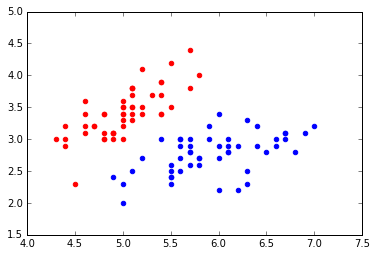

In [7]:
plt.scatter(X[y==0,0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')

### 调用自己封装的包

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)


from playML.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit_gd(X_train, y_train)

LogisticRegression()

In [9]:
log_reg.score(X_test, y_test)

0.6

In [10]:
log_reg.score(X_train, y_train)

0.4666666666666667

In [11]:
log_reg.predict_proba(X_test)

array([1.61021563e-04, 4.86416278e-04, 4.58956825e-04, 5.45755097e-04,
       3.76493665e-04, 6.17529463e-04, 3.38215845e-04, 1.80772098e-04,
       7.92052785e-05, 2.75255612e-04, 2.14852208e-04, 2.04442759e-04,
       5.82995158e-04, 3.76493665e-04, 1.06585220e-04, 5.15232585e-04,
       2.94043342e-04, 5.23733490e-04, 1.45795940e-04, 6.48958068e-04,
       3.52439677e-04, 2.61920423e-04, 7.92052785e-05, 6.39145977e-05,
       7.52746780e-04])

In [13]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0])

In [14]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
log.score(X_test, y_test)

1.0

In [16]:
log.predict_proba(X_test)

array([[0.14735172, 0.85264828],
       [0.05376284, 0.94623716],
       [0.74783567, 0.25216433],
       [0.72243224, 0.27756776],
       [0.88839725, 0.11160275],
       [0.92687643, 0.07312357],
       [0.86713871, 0.13286129],
       [0.02191762, 0.97808238],
       [0.06799646, 0.93200354],
       [0.31807664, 0.68192336],
       [0.87417634, 0.12582366],
       [0.974718  , 0.025282  ],
       [0.6519076 , 0.3480924 ],
       [0.88839725, 0.11160275],
       [0.2377031 , 0.7622969 ],
       [0.27774476, 0.72225524],
       [0.25128915, 0.74871085],
       [0.6056002 , 0.3943998 ],
       [0.8418136 , 0.1581864 ],
       [0.69551163, 0.30448837],
       [0.91710118, 0.08289882],
       [0.72132222, 0.27867778],
       [0.06799646, 0.93200354],
       [0.04675098, 0.95324902],
       [0.82524546, 0.17475454]])

In [21]:
theta = log.coef_[0][0]

In [22]:
b = log.intercept_

In [28]:
def x2(x1):
    return (-log.coef_[0][0]*x1 - b) / log.coef_[0][1]

In [29]:
x_plot = np.linspace(4, 8, 1000)
y_plot = x2(x_plot)

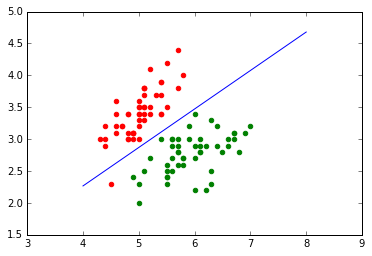

In [31]:
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='g')
plt.plot(x_plot, y_plot, color='b')

## 不规则的决策边界的绘制方法

In [36]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[1]-axis[0])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


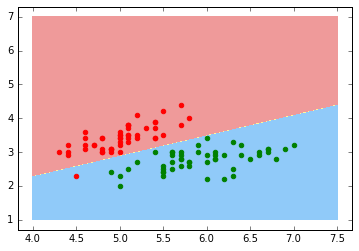

In [37]:
plot_decision_boundary(log, axis=[4, 7.5, 1, 7])
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='g')

### kNN的决策边界

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


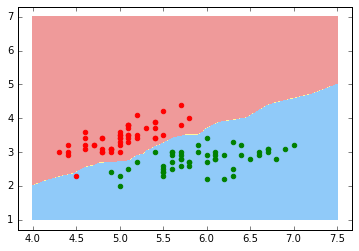

In [40]:
plot_decision_boundary(knn, axis=[4, 7.5, 1, 7])
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='g')

In [41]:
knn.score(X_test, y_test)

1.0

In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

iris = datasets.load_iris()


knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


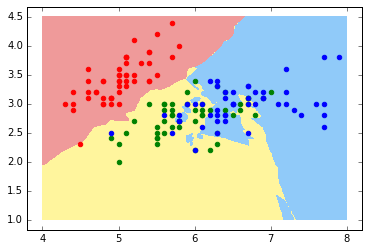

In [56]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1], color='r')
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1], color='g')
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1], color='b')

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


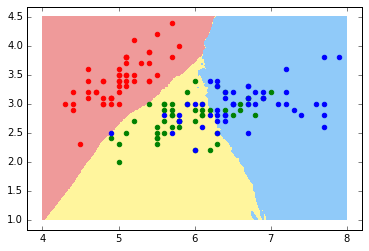

In [57]:
knn_clf_all2 = KNeighborsClassifier(n_neighbors=50)
knn_clf_all2.fit(iris.data[:,:2], iris.target)

plot_decision_boundary(knn_clf_all2, axis=[4, 8, 1, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1], color='r')
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1], color='g')
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1], color='b')

## 逻辑回归中添加多项式特征

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:,0]**2 + X[:, 1]**2 < 1.5, dtype='int')

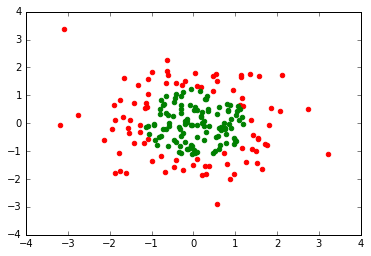

In [3]:
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='g')

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
log_reg.score(X, y)

0.605

In [6]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[1]-axis[0])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


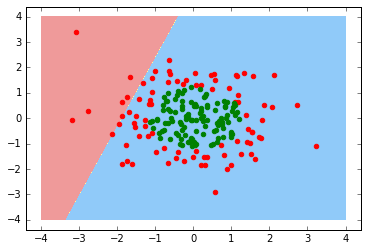

In [8]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='g')

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def lr2d(degree):
    return Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('lr', LogisticRegression())
        ])

In [10]:
log_reg2 = lr2d(degree=2)

In [11]:
log_reg2.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [12]:
log_reg2.score(X, y)

0.975

## sklearn中的lr正则项

In [13]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:,0]**2 + X[:, 1] < 1.5, dtype='int')

In [15]:
#添加噪声

for i in range(20):
    y[np.random.randint(200)] = 1

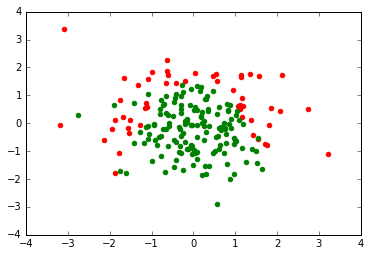

In [16]:
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='g')

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()#默认penalty为 L2 ， C = 1.0 -- J（θ）的系数
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
log_reg.score(X_test, y_test)

0.8

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


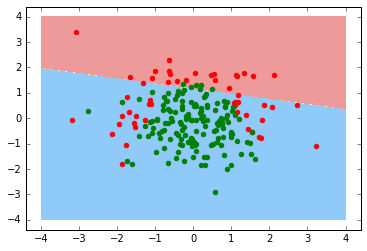

In [22]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='g')

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('std_scaler', StandardScaler()),
            ('lr', LogisticRegression())
        ])

In [26]:
lr_poly = PolynomialLogisticRegression(degree=2)
lr_poly.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [27]:
lr_poly.score(X_train, y_train)

0.9133333333333333

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


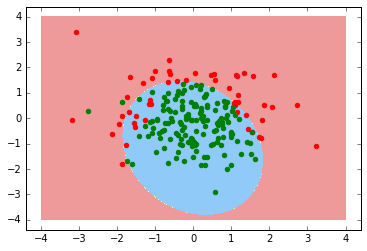

In [29]:
plot_decision_boundary(lr_poly, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='g')

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree, C):
    return Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('std_scaler', StandardScaler()),
            ('lr', LogisticRegression(C=C))
        ])

In [33]:
lr_poly2 = PolynomialLogisticRegression(20, 0.1)
lr_poly2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


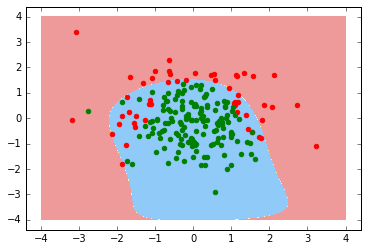

In [35]:
plot_decision_boundary(lr_poly2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='g')

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


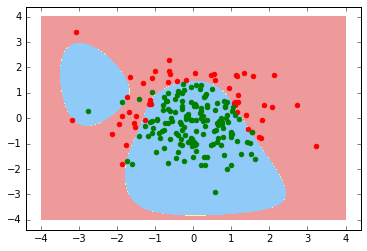

In [36]:
lr_poly3 = PolynomialLogisticRegression(20, 50)
lr_poly3.fit(X_train, y_train)
plot_decision_boundary(lr_poly3, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='g')

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


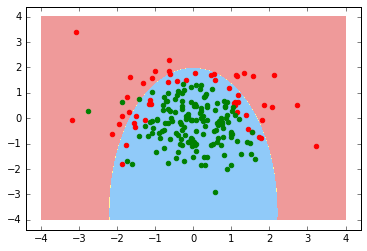

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegressionL1(degree, C, penalty='l1'):
    return Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('std_scaler', StandardScaler()),
            ('lr', LogisticRegression(C=C, penalty=penalty))
        ])


lr_poly4 = PolynomialLogisticRegressionL1(20, 0.1,'l1')
lr_poly4.fit(X_train, y_train)
plot_decision_boundary(lr_poly4, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='g')

## 9-8解决多分类问题OvR、OvO

- OvR:one vs rest转化为多个二分类问题  
- OvO：one vs one每次只考虑其中两个类别,进行$C_4^2$次二分类，n^2复杂度，结果更准

**鸢尾花数据集实验**

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [44]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
#上面的输出结果看到，multi_class='ovr'，默认支持多分类，one vs rest

In [46]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[1]-axis[0])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


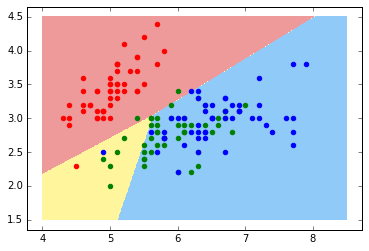

In [47]:
plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='g')
plt.scatter(X[y==2, 0], X[y==2, 1], color='b')

In [48]:
# ovo:参数2个

log_reg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
log_reg2.score(X_test, y_test)

0.7894736842105263

In [50]:
log_reg.score(X_test, y_test)

0.6578947368421053

In [51]:
# 使用所有数据

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
log_all = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [52]:
log_all.fit(X_train, y_train)
log_all.score(X_test, y_test)

1.0

### 实验：手写数字分别用OvO、OvR

In [56]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [57]:
X.shape

(1797, 64)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_ovr = LogisticRegression()

In [62]:
%time lr_ovr.fit(X_train, y_train)

Wall time: 153 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
lr_ovr.score(X_test, y_test)

0.9488888888888889

In [64]:
lr_ovo = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [66]:
%time lr_ovo.fit(X_train, y_train)

Wall time: 900 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
lr_ovo.score(X_test, y_test)

0.9511111111111111

## OvO and OvR  
sklearn中封装的类，可以传入任意二分类器

In [53]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

0.9473684210526315

In [55]:
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

1.0